In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\ellin\Desktop\Kaggle_Titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\ellin\Desktop\Kaggle_Titanic\gender_submission.csv
C:\Users\ellin\Desktop\Kaggle_Titanic\submission1.csv
C:\Users\ellin\Desktop\Kaggle_Titanic\test.csv
C:\Users\ellin\Desktop\Kaggle_Titanic\train.csv


In [2]:
train_data = pd.read_csv(r"C:\Users\ellin\Desktop\Kaggle_Titanic/train.csv")
test_data = pd.read_csv(r"C:\Users\ellin\Desktop\Kaggle_Titanic/test.csv")

In [3]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()#counts the survivors
    dead = train_data[train_data['Survived']==0][feature].value_counts()#counts the casualties
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [7]:
train_test_data = [train_data, test_data] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
print(train_data['Title'])

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64


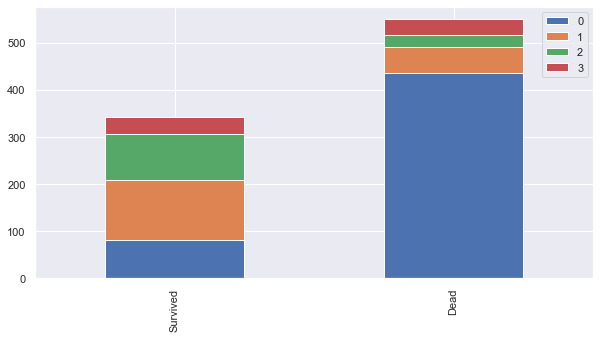

In [8]:
bar_chart('Title')


In [9]:
#enumarate sex

sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
print(train_data['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [10]:
train_data.head(10)
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

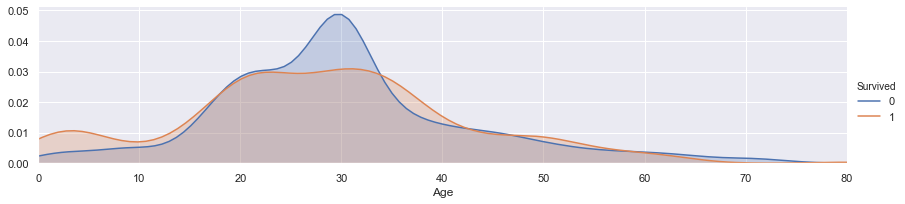

In [11]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
 
plt.show()


In [12]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
#feature vector map: child: 0 young: 1 adult: 2 mid-age: 3 senior: 4

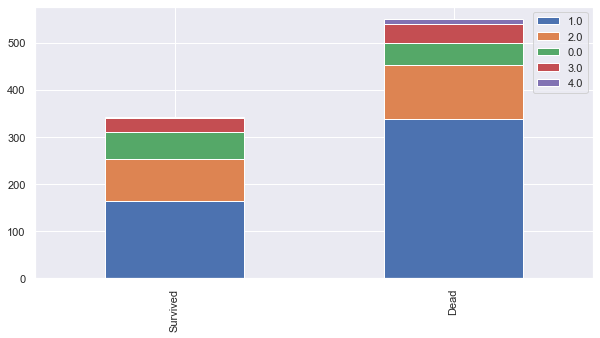

In [13]:
bar_chart('Age')

<AxesSubplot:>

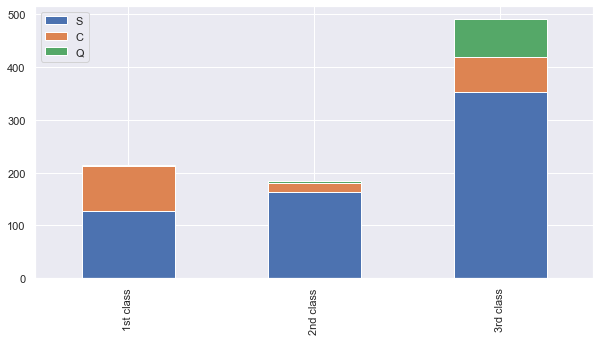

In [14]:
#making the cabin feature vector
Pclass1 = train_data[train_data['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [15]:
for data in train_test_data:
    data['Embarked'] = data['Embarked'].fillna("S")
    
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [16]:
#fare into numerical values
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,1,2


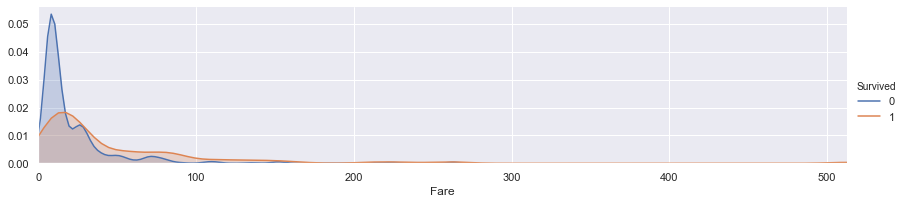

In [17]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.show()
#figuring how to scale the feature vector


(0.0, 30.0)

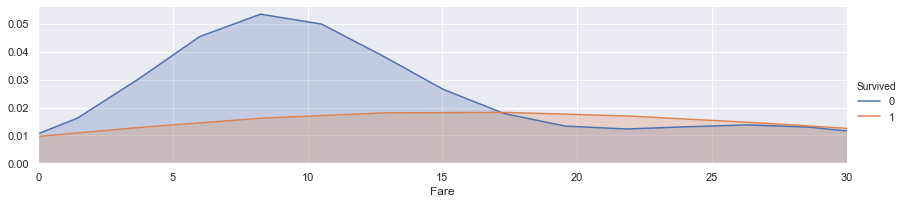

In [18]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.xlim(0, 30)

In [19]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [20]:
train_data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
E12            1
A6             1
A7             1
C104           1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [21]:
for data in train_test_data:
    data["Cabin"] = data["Cabin"].str[:1]
    
#Keeping the first letter of cabin

In [22]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [23]:
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

(0.0, 11.0)

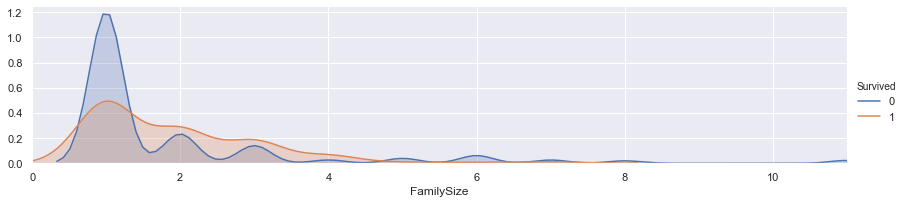

In [24]:
train_data["FamilySize"] = train_data['SibSp'] + train_data['Parch'] + 1
test_data["FamilySize"] = test_data['SibSp'] + test_data['Parch'] + 1

facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [25]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [26]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis =1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

#dropping the unnesesary cols


In [27]:
#After feature vector creation we fit the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [28]:
train_data.info

<bound method DataFrame.info of      Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)
target = train_data['Survived']#y values
train = train_data.drop('Survived', axis=1)#Leaving the x values
train = train.drop('Name', axis=1)

train_data.shape, target.shape
train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,2.0,3.0,0.8,1,2,0.4
2,3,1,1.0,1.0,2.0,0,1,0.0
3,1,1,2.0,3.0,0.8,0,2,0.4
4,3,0,2.0,1.0,2.0,0,0,0.0


In [30]:
from sklearn.linear_model import LogisticRegression
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))

#KNN model

[0.8        0.79775281 0.80898876 0.7752809  0.86516854 0.82022472
 0.82022472 0.80898876 0.84269663 0.82022472]
0.8159550561797753


In [31]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))
#Random Forest

[0.84444444 0.82022472 0.82022472 0.80898876 0.87640449 0.80898876
 0.87640449 0.80898876 0.7752809  0.80898876]
0.8248938826466917


In [32]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))
#Naive Bayes

[0.83333333 0.73033708 0.74157303 0.75280899 0.71910112 0.80898876
 0.75280899 0.78651685 0.83146067 0.83146067]
0.7788389513108613


In [33]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))
#Support vector machine

[0.82222222 0.78651685 0.82022472 0.80898876 0.84269663 0.82022472
 0.82022472 0.84269663 0.83146067 0.85393258]
0.8249188514357053


In [34]:
#So SVM has the biggest accuracy score

In [35]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(np.mean(score))
#Decision Tree

[0.8        0.87640449 0.83146067 0.78651685 0.86516854 0.82022472
 0.84269663 0.82022472 0.76404494 0.80898876]
0.8215730337078652


In [36]:
clf = SVC()
clf.fit(train, target)
test = test_data.drop("PassengerId", axis=1)
test = test.drop("Name", axis=1)

prediction = clf.predict(test)

#Testing


In [37]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })
submission.to_csv(r'C:\Users\ellin\Desktop\Kaggle_Titanic\submission1.csv', index=False)

In [38]:
submission = pd.read_csv(r'C:\Users\ellin\Desktop\Kaggle_Titanic\submission1.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
